In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt # to plot charts

from sklearn.model_selection import train_test_split

seed = 42
np.random.RandomState(seed)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
# Kers modules
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from keras.callbacks import EarlyStopping, History, LearningRateScheduler

Using TensorFlow backend.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt # to plot charts

from sklearn.model_selection import train_test_split

seed = 42
np.random.RandomState(seed)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [4]:
train_df = pd.read_csv("../input/train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
y = train_df.values[:, 0]
X = train_df.values[:, 1:]
X = X.reshape(-1, 28, 28, 1)

In [6]:
train_df.shape

(42000, 785)

In [7]:
X.shape

(42000, 28, 28, 1)

In [8]:
y = to_categorical(y)
y.shape

(42000, 10)

In [9]:
validation_split = .3

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_split, stratify=y, random_state=seed)

In [10]:
print(X_train.shape, y_train.shape)

(29400, 28, 28, 1) (29400, 10)


In [11]:
print(X_val.shape, y_val.shape)

(12600, 28, 28, 1) (12600, 10)


In [12]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, padding='same', strides=1, activation='relu', input_shape=(28, 28, 1)))

model.add(Conv2D(64, kernel_size=3, padding='same', strides=1, activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(128, kernel_size=3, padding='same', strides=1, activation='relu'))

model.add(Conv2D(128, kernel_size=3, padding='same', strides=1, activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(256, kernel_size=3, padding='same', strides=1, activation='relu'))

model.add(Conv2D(256, kernel_size=3, padding='same', strides=1, activation='relu'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(2048, activation='relu'))

model.add(Dropout(rate=0.15))

model.add(Dense(1024, activation='relu'))

model.add(Dropout(rate=0.15))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
early_stopping_monitor = EarlyStopping(patience=5) # (min_delta=1e-3)
annealing = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [14]:
training = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, 
                     callbacks=[early_stopping_monitor, annealing])

Instructions for updating:
Use tf.cast instead.
Train on 29400 samples, validate on 12600 samples
Epoch 1/50
29400/29400 [==============================] - 17s 567us/step - loss: 0.3276 - acc: 0.9324 - val_loss: 0.2205 - val_acc: 0.9430
Epoch 2/50
29400/29400 [==============================] - 13s 457us/step - loss: 0.0750 - acc: 0.9794 - val_loss: 0.0564 - val_acc: 0.9835
Epoch 3/50
29400/29400 [==============================] - 13s 456us/step - loss: 0.0614 - acc: 0.9837 - val_loss: 0.0841 - val_acc: 0.9794
Epoch 4/50
29400/29400 [==============================] - 13s 456us/step - loss: 0.0535 - acc: 0.9855 - val_loss: 0.0520 - val_acc: 0.9875
Epoch 5/50
29400/29400 [==============================] - 13s 457us/step - loss: 0.0389 - acc: 0.9903 - val_loss: 0.0512 - val_acc: 0.9889
Epoch 6/50
29400/29400 [==============================] - 13s 457us/step - loss: 0.0354 - acc: 0.9907 - val_loss: 0.0937 - val_acc: 0.9802
Epoch 7/50
29400/29400 [==============================] - 13s 456us/

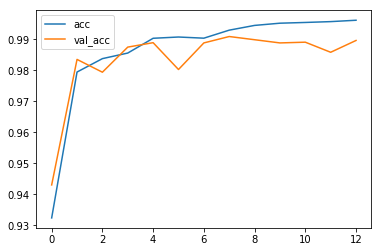

In [15]:
history = training.history

sns.lineplot(x=range(len(history["acc"])),y=history["acc"], label="acc")
sns.lineplot(x=range(len(history["val_acc"])),y=history["val_acc"], label="val_acc")

In [16]:
predict_df = pd.read_csv("../input/test.csv")

predict_df.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
X_predict = predict_df.values
X_predict = X_predict.reshape(-1, 28, 28, 1)

In [18]:
X_predict.shape

(28000, 28, 28, 1)

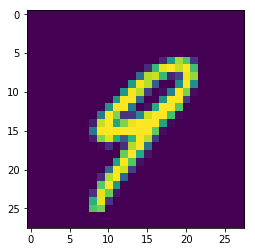

In [19]:
plt.imshow(X_train[0].reshape(28, 28))

In [20]:
predictions = model.predict_classes(X_predict)
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [21]:
predictions.shape

(28000,)

In [22]:
## create output
output = pd.DataFrame()

output["ImageId"] = [i for i in range(1, predictions.shape[0]+1)]
output["Label"] = predictions

output.to_csv("predictions_cnn_3.csv", index=False)